# Proyek Akhir Analis Data : Bike Sharing dataset

Nama  : Akmal Fauzan Restu Agung

Email : aafauzan52@gmail.com

## Menentukan pertanyaan bisnis

### Pertanyaan 1
Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian?

### Pertanyaan 2
Bagaimana dampak cuaca terhadap pola penyewaan sepeda secara jam per jam?

### Import library yang akan di gunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

### Import dan baca dataset

In [2]:
day = pd.read_csv('./data/day.csv')
hour = pd.read_csv('./data/hour.csv')

### Preview Dataframe pada 5 data pertama

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

### Penilaian pada data day

In [5]:
day.shape

(731, 16)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cek data kosong / null

In [7]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### cek apakah ada data duplikat

In [8]:
day.duplicated().sum()

0

### cek distribusi nilai statistik

In [1]:
day.describe()

NameError: name 'day' is not defined

Pada hasil Assesing di atas terdapat beberapa kesimpulan :

1. Tidak ada Nilai Null / hilang yang terdapat pada setiap kolom
2. Tidak ada data yang terindikasi data duplikat
3. kesalahan format data pada kolom dteday
4. Pada kolom weahersit nilai maksimal nya adalah 3 =  Salju ringan, hujan ringan + badai petir + awan terpisah, hujan ringan + awan terpisah dan tidak ada yang meminjam pada cuaca 4 = Hujan deras + es, badai + kabut, salju + kabut.

### Penilaian pada data Hour

In [10]:
hour.shape

(17379, 17)

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cek data kosong / null

In [12]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### cek apakah ada data duplikat

In [13]:
hour.duplicated().sum()

0

### cek distribusi nilai statistik

In [14]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada hasil Assesing di atas terdapat beberapa kesimpulan :

1. Tidak ada Nilai Null / hilang yang terdapat pada setiap kolom
2. Tidak ada data yang terindikasi data duplikat
3. kesalahan format data pada kolom dteday
4. Berbeda pada data day pada data hour ini terdapat data yang meminjam pada cuaca 4 = Hujan deras + es, badai + kabut, salju + kabut.

## Cleaning data

### Ubah tipe data kolom dteday pada data day

In [15]:
day['dteday'] = pd.to_datetime(day['dteday'])

In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Ubah tipe data kolom dteday pada data hour

In [17]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [18]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Menghapus kolom yang tidak akan di gunakan dalam analisis

In [19]:
dropColDay = ['instant']
day.drop(columns=dropColDay, inplace=True)

In [20]:
dropColHour = ['instant']
hour.drop(columns=dropColHour, inplace=True)

## Exploratory Data Analyst

### Terdapat beberapa pertanyaan yang akan di eksplor pada EDA 

Di antaranya adalah sebagai berikut :

1. Bagaimana pengaruh suhu (temp) dan kelembapan (hum) terhadap jumlah penyewaan sepeda harian?
2. Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?
3. Bagaimana distribusi penyewaan sepeda menurut musim (season)?
4. Bagaimana jumlah penyewaan sepeda bervariasi pada kondisi cuaca berbeda (weathersit)?
5. Apakah ada pola tertentu pada jam-jam tertentu dalam sehari terkait dengan kondisi cuaca?
6. Apakah ada korelasi antara kondisi cuaca (suhu, kelembapan, kecepatan angin) dengan jumlah penyewaan pengguna terdaftar dan tidak terdaftar?

### Menjawab pertanyaan 1

1. Bagaimana pengaruh suhu (temp) dan kelembapan (hum) terhadap jumlah penyewaan sepeda harian?

In [21]:
day[['temp', 'hum', 'cnt']].describe()

,temp,hum,cnt
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,4504.348837
std,0.183051,0.142429,1937.211452
min,0.059130,0.000000,22.000000
25%,0.337083,0.520000,3152.000000
50%,0.498333,0.626667,4548.000000
75%,0.655417,0.730209,5956.000000
max,0.861667,0.972500,8714.000000


Ditribusi statistik ini menunjukkan bahwa suhu dan kelembapan berpengaruh terhadap jumlah penyewaan sepeda harian. Ketika kondisi terlalu ekstrem (baik terlalu panas/dingin atau terlalu lembap/kering), jumlah penyewaan cenderung lebih rendah.

In [22]:
correlation = day[['temp', 'hum', 'cnt']].corr()
correlation

,temp,hum,cnt
temp,1.000000,0.126963,0.627494
hum,0.126963,1.000000,-0.100659
cnt,0.627494,-0.100659,1.000000


Dari Hasil korelasi di atas dapat di simpulkan bahwa :

1. Suhu (temp) memiliki pengaruh yang cukup besar terhadap jumlah penyewaan sepeda (cnt). Secara umum, ketika suhu meningkat dalam rentang yang nyaman bagi pengguna (misalnya, dari suhu dingin menuju lebih hangat), jumlah penyewaan sepeda cenderung ikut meningkat. Artinya, semakin nyaman suhu cuaca, semakin banyak orang yang tertarik untuk menyewa sepeda. Namun, suhu yang terlalu ekstrem mungkin memiliki efek sebaliknya dan menurunkan minat penyewaan.
2. Kelembapan (hum) memiliki pengaruh yang lemah dan sedikit negatif terhadap jumlah penyewaan sepeda. Artinya, ketika kelembapan meningkat, jumlah penyewaan sepeda cenderung sedikit berkurang, tetapi dampak kelembapan ini tidak begitu besar atau signifikan. Pengaruhnya relatif kecil dibandingkan dengan pengaruh suhu.

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_24008\371458223.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='hum_category', y='cnt', data=day, ci=None)


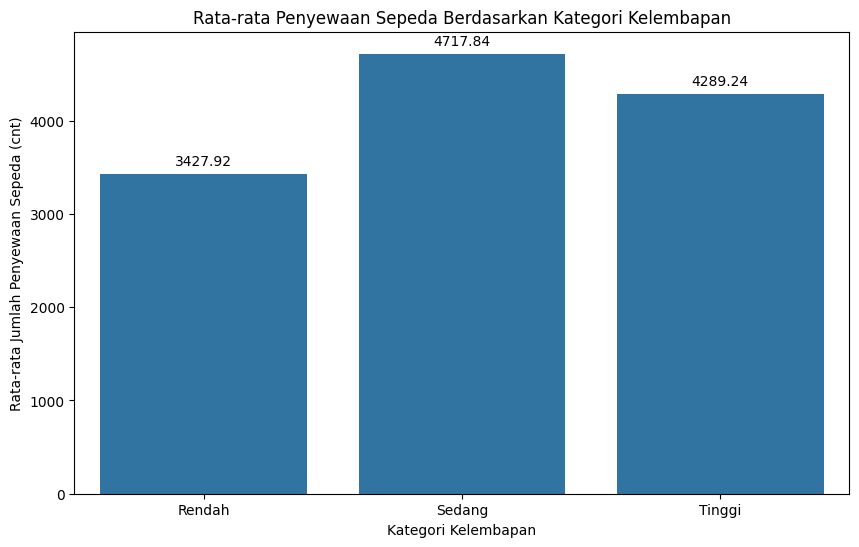

In [23]:
# Membagi kelembapan ke dalam kategori (bins) untuk bar plot
day['hum_category'] = pd.cut(day['hum'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Bar plot untuk melihat rata-rata penyewaan pada kategori kelembapan
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='hum_category', y='cnt', data=day, ci=None)

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Kelembapan')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.show()

Tingkat kelembapan sedang memiliki pengaruh positif terhadap jumlah penyewaan sepeda, menghasilkan jumlah penyewaan yang lebih tinggi dibandingkan kelembapan rendah atau tinggi.
Kelembapan rendah (sangat kering) dan kelembapan tinggi (sangat lembap) cenderung membuat penyewaan lebih sedikit, kemungkinan karena kedua kondisi tersebut membuat cuaca menjadi kurang nyaman untuk bersepeda.

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_24008\3427583389.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


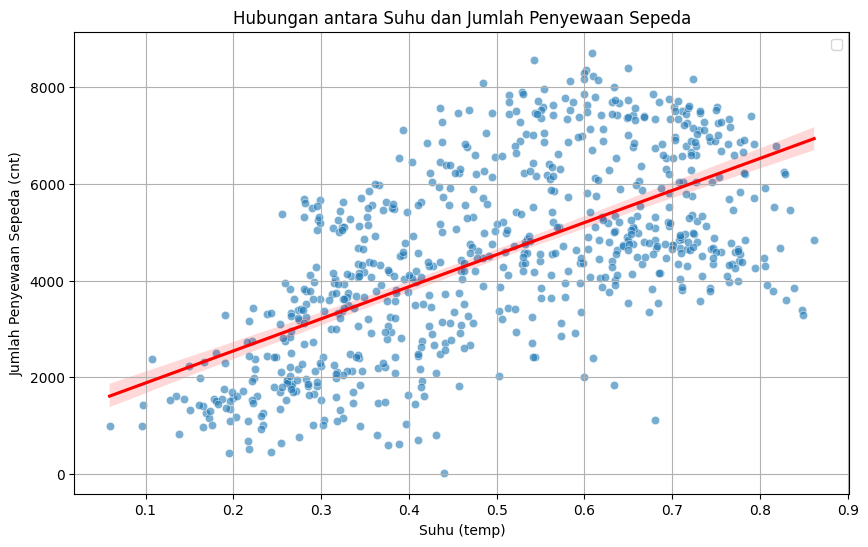

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day, alpha=0.6)
sns.regplot(x='temp', y='cnt', data=day, scatter=False, color='red', line_kws={'label': 'Trend Line'})
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.legend()
plt.grid(True)
plt.show()

### Kesimpulan utama

1. Suhu memiliki pengaruh yang cukup signifikan terhadap jumlah penyewaan sepeda, di mana peningkatan suhu cenderung meningkatkan penyewaan, asalkan tidak mencapai tingkat yang terlalu ekstrem.
2. Cuaca yang lebih hangat lebih kondusif bagi masyarakat untuk menyewa sepeda, yang artinya penyewaan cenderung lebih tinggi pada hari-hari dengan suhu yang lebih nyaman.

### Menjawab pertanyaan 2

2. Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?

In [25]:
day['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

data di atas merepresentasikan nilai 0 sebagai hari libur dan 1 sebagai hari kerja

In [26]:
summary = day.groupby('workingday').agg({
    'cnt': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

In [27]:
summary

,workingday,cnt,registered,casual
0,0,1000269,683537,316732
1,1,2292410,1989125,303285


- Total Penyewaan:
    - Pada hari kerja, total penyewaan sepeda mencapai 1,000,269 unit.
    - Pada hari libur, total penyewaan sepeda adalah 2,292,410 unit.
    Ini menunjukkan bahwa jumlah penyewaan sepeda pada hari libur jauh lebih tinggi dibandingkan dengan hari kerja.

- Pengguna Terdaftar vs. Tidak Terdaftar:
    - Pengguna Terdaftar:
        - Pada hari kerja, jumlah pengguna terdaftar adalah 683,537.
        - Pada hari libur, pengguna terdaftar meningkat menjadi 1,989,125.
- Pengguna Tidak Terdaftar:
    - Pada hari kerja, jumlah pengguna tidak terdaftar adalah 316,732.
        - Pada hari libur, jumlahnya adalah 303,285.
    Ini menunjukkan bahwa baik pengguna terdaftar maupun tidak terdaftar mengalami peningkatan yang signifikan pada hari libur dibandingkan dengan hari kerja.

- Pola Penyewaan:
    - Terdapat kecenderungan yang jelas bahwa lebih banyak orang menggunakan sepeda untuk penyewaan pada hari libur dibandingkan dengan hari kerja. Hal ini mungkin terkait dengan aktivitas rekreasi yang lebih tinggi atau penggunaan sepeda untuk kegiatan di luar ruangan selama akhir pekan atau hari libur.

In [28]:
day['day'] = day['weekday'].map({
    0: "Minggu",
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'kamis',
    5: "Jum'at",
    6: "Sabtu"

})

In [29]:
summary['workingday'] = summary['workingday'].map({1: 'Working Day', 0: 'Non-Working Day'})

In [30]:
day['hari'] = day['workingday'].map({1: 'Working Day', 0: 'Non-Working Day'})

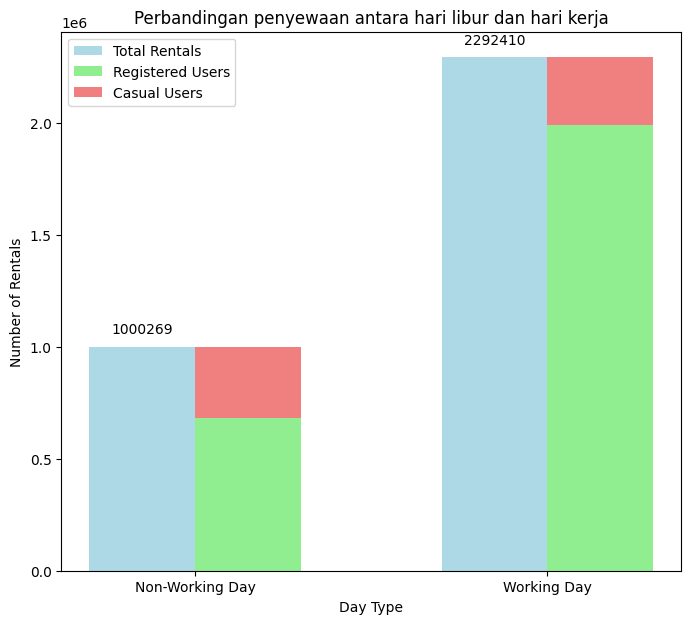

In [31]:
# Visualisasi dengan bar plot
plt.figure(figsize=(8, 7))
bar_width = 0.3
x = summary['workingday']

# Mengatur posisi bar
r1 = range(len(summary))
r2 = [x + bar_width for x in r1]

# Membuat bar plot
plt.bar(r1, summary['cnt'], width=bar_width, label='Total Rentals', color='lightblue')
plt.bar(r2, summary['registered'], width=bar_width, label='Registered Users', color='lightgreen')
plt.bar(r2, summary['casual'], width=bar_width, label='Casual Users', color='lightcoral', bottom=summary['registered'])

# Menambahkan label dan judul
plt.xlabel('Day Type')
plt.ylabel('Number of Rentals')
plt.title('Perbandingan penyewaan antara hari libur dan hari kerja')
plt.xticks([r + bar_width / 2 for r in range(len(summary))], summary['workingday'])
plt.legend()

# Menambahkan angka di atas bar Total Rentals
for index, value in enumerate(summary['cnt']):
    plt.text(r1[index], value + 0.02 * max(summary['cnt']), str(int(value)), ha='center', va='bottom')

# Menampilkan plot
plt.show()

### Kesimpulan dari Visualisasi

- Terdapat perbedaan signifikan dalam jumlah total penyewaan sepeda antara hari kerja dan hari libur.
- Pada hari libur (Non-Working Day), total penyewaan mencapai sekitar 1,000,000 unit, sedangkan pada hari kerja (Working Day), total penyewaan jauh lebih tinggi, yaitu sekitar 2,300,000 unit.
- Pada hari kerja, jumlah pengguna terdaftar (registered users) lebih tinggi dibandingkan dengan pengguna tidak terdaftar (casual users). Ini terlihat dari bagian hijau (registered) yang lebih besar dibandingkan bagian merah (casual) pada batang hari kerja.
- Sebaliknya, pada hari libur, meskipun pengguna terdaftar juga meningkat, proporsi pengguna tidak terdaftar juga cukup signifikan, meskipun tetap lebih rendah dibandingkan pengguna terdaftar.
- Grafik menunjukkan bahwa ada kecenderungan yang lebih tinggi bagi pengguna terdaftar untuk menyewa sepeda pada hari kerja, sementara pada hari libur, ada peningkatan dalam total penyewaan secara keseluruhan. Ini mungkin mencerminkan bahwa lebih banyak orang yang beraktivitas di luar rumah pada hari libur, termasuk mereka yang tidak terdaftar.

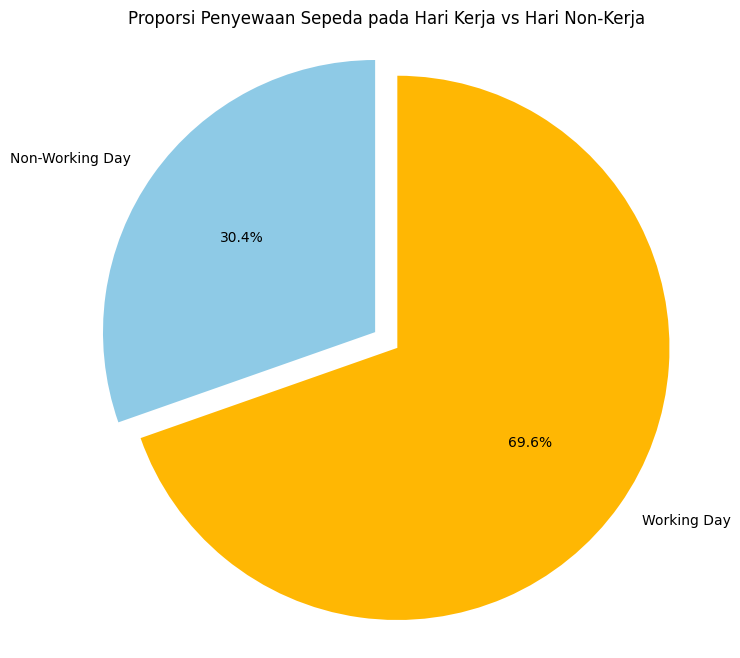

In [32]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(summary['cnt'], labels=summary['workingday'], autopct='%1.1f%%', startangle=90, colors=['#8ecae6', '#ffb703'], explode=[0, 0.1])
plt.title("Proporsi Penyewaan Sepeda pada Hari Kerja vs Hari Non-Kerja")
plt.axis('equal') 
    
# Tampilkan plot
plt.show()

### Kesimpulan dari Visualisasi

- Pada hari kerja (Working Day), penyewaan sepeda mencakup sekitar 69.6% dari total penyewaan.
- Sementara itu, pada hari non-kerja (Non-Working Day), penyewaan sepeda hanya mencakup sekitar 30.4%.
- Data ini menunjukkan bahwa lebih banyak orang memilih untuk menyewa sepeda pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh berbagai faktor, seperti kebutuhan transportasi untuk bekerja, serta ketersediaan sepeda yang lebih baik pada hari kerja.

### Menjawab pertanyaan 3

3. Bagaimana distribusi penyewaan sepeda menurut musim (season)?

In [33]:
day['musim'] = day['season'].map({
    1: 'musim semi',
    2: 'musim panas',
    3: 'musim gugur',
    4: 'musim dingin'
})

In [34]:
# Menghitung total penyewaan per musim
summary_season = day.groupby('season').agg({
    'cnt': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

# Menampilkan summary
summary_season


,season,cnt,registered,casual
0,1,471348,410726,60622
1,2,918589,715067,203522
2,3,1061129,835038,226091
3,4,841613,711831,129782


dari disribusi ragkuman data di atas dapat di simpulkan bahwa :

- Musim Panas (season 2) Memiliki Jumlah Penyewaan Terbanyak :
    - Total penyewaan sepeda (cnt) mencapai angka 1.06 juta selama musim panas, lebih tinggi dibandingkan musim lainnya. Ini mengindikasikan bahwa musim panas adalah waktu yang paling populer bagi pengguna untuk menyewa sepeda. Cuaca yang lebih baik selama musim ini mungkin menjadi faktor pendorong.
    
- Musim Semi (season 1) Juga Memiliki Tingkat Penyewaan Tinggi:
    - Musim semi mencatat jumlah penyewaan sepeda sekitar 918.589, berada di urutan kedua setelah musim panas. Ini menunjukkan bahwa cuaca yang hangat namun tidak terlalu panas juga mendorong banyak orang untuk bersepeda.

- Musim Dingin (season 4) Memiliki Jumlah Penyewaan Paling Rendah:
    - Seperti yang diharapkan, musim dingin mencatat angka penyewaan paling rendah (841.613) dengan penyewa terdaftar dan kasual lebih sedikit. Ini mungkin karena kondisi cuaca yang kurang kondusif untuk aktivitas di luar ruangan seperti bersepeda.

- Di setiap musim, pengguna terdaftar lebih dominan dibandingkan pengguna kasual. Misalnya, pada musim panas, pengguna terdaftar mencapai 835.038, jauh lebih besar daripada pengguna kasual yang hanya 226.091. Hal ini menunjukkan bahwa sebagian besar pengguna cenderung memiliki keanggotaan terdaftar, mungkin karena mereka adalah pengguna reguler.

- Terdapat peningkatan jumlah pengguna kasual pada musim semi dan musim panas (203.522 di musim semi dan 226.091 di musim panas). Ini bisa mengindikasikan bahwa lebih banyak wisatawan atau pengguna yang tidak terdaftar tertarik untuk menyewa sepeda selama musim-musim ini, mungkin untuk rekreasi atau liburan.

- Pengguna kasual di musim dingin (129.782) berkurang signifikan dibandingkan musim lainnya. Ini mungkin disebabkan oleh cuaca dingin yang mengurangi keinginan untuk melakukan aktivitas luar ruangan bagi pengguna non-reguler.

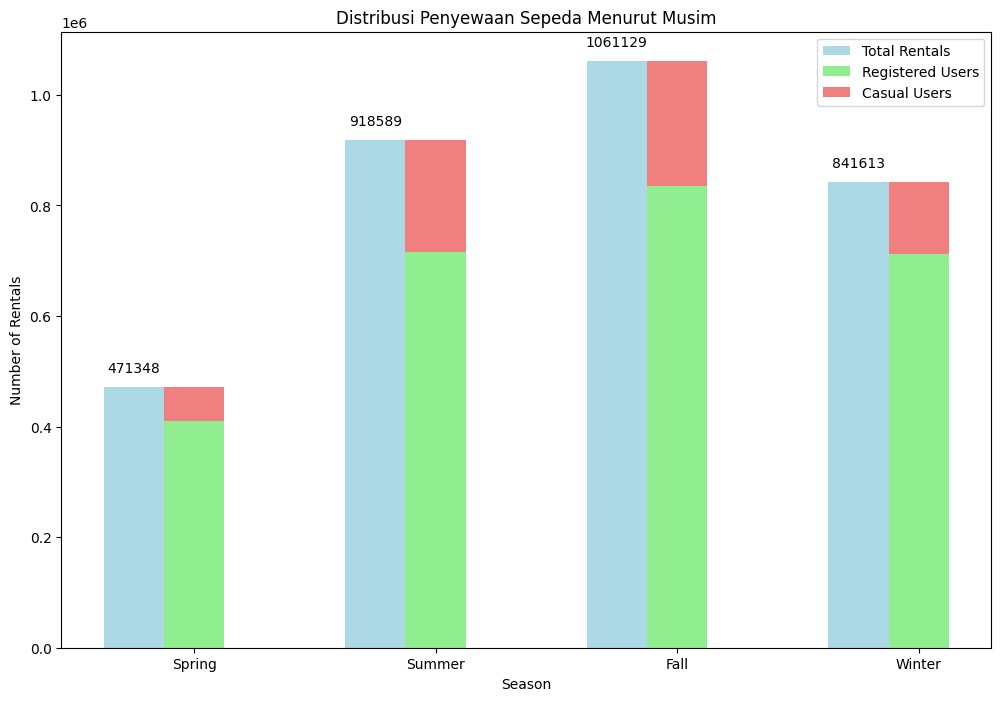

In [35]:
# Visualisasi dengan bar plot
plt.figure(figsize=(12, 8))
bar_width = 0.25
x = summary_season['season']
r1 = np.arange(len(summary_season)) 
r2 = r1 + bar_width  

# Membuat bar plot
plt.bar(r1, summary_season['cnt'], width=bar_width, label='Total Rentals', color='lightblue')
plt.bar(r2, summary_season['registered'], width=bar_width, label='Registered Users', color='lightgreen')
plt.bar(r2, summary_season['casual'], width=bar_width, label='Casual Users', color='lightcoral', bottom=summary_season['registered'])

# Menambahkan label dan judul
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.title('Distribusi Penyewaan Sepeda Menurut Musim')
plt.xticks(r1 + bar_width, ['Spring', 'Summer', 'Fall', 'Winter'])  
plt.legend()

# Menambahkan angka di atas bar Total Rentals
for index, value in enumerate(summary_season['cnt']):
    plt.text(r1[index], value + 0.02 * max(summary_season['cnt']), str(int(value)), ha='center', va='bottom')

# Menampilkan plot
plt.show()

### Kesimpulan dari visualisasi

- Penyewaan sepeda mencapai puncaknya di musim gugur dan musim panas, didorong oleh cuaca yang lebih baik.

- Pengguna terdaftar sangat mendominasi dalam hal penyewaan sepeda di setiap musim, sementara pengguna kasual lebih aktif pada musim panas dan gugur.

- Musim dingin menunjukkan penurunan drastis dalam penyewaan, terutama di kalangan pengguna kasual, yang dapat dikaitkan dengan cuaca yang kurang kondusif untuk bersepeda.

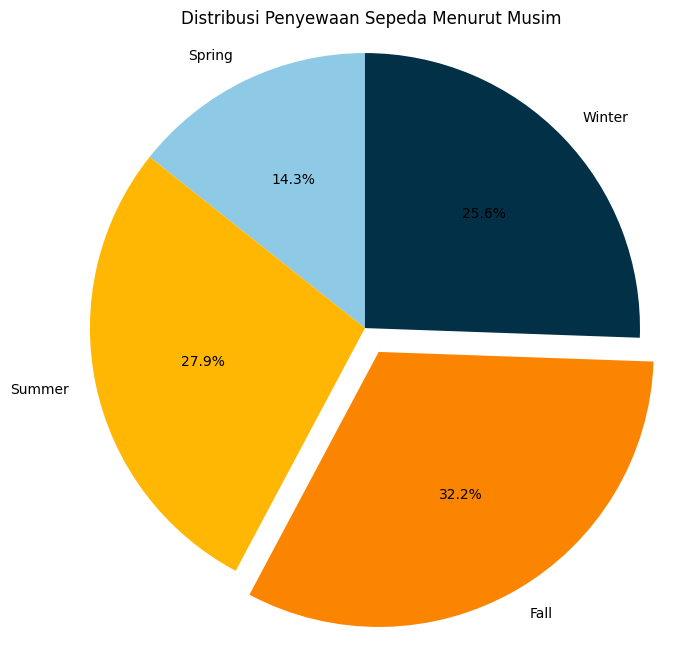

In [36]:
# Mapping label musim
labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(summary_season['cnt'], labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['#8ecae6', '#ffb703', '#fb8500', '#023047'], explode=[0, 0, 0.1, 0])
plt.title('Distribusi Penyewaan Sepeda Menurut Musim')
plt.axis('equal') 
plt.show()

### Kesimpulan dari visualisasi

- 32.2% dari total penyewaan sepeda terjadi pada musim gugur. Ini menunjukkan bahwa musim gugur adalah musim yang paling populer untuk menyewa sepeda. Faktor cuaca yang nyaman dan stabil di musim ini bisa menjadi alasan utama di balik tingginya penyewaan.

- Musim panas menyumbang 27.9% dari total penyewaan sepeda. Meskipun berada di urutan kedua, musim panas tetap merupakan periode yang sangat sibuk, mungkin karena banyaknya aktivitas rekreasi dan liburan selama musim ini, yang mendorong lebih banyak orang untuk menyewa sepeda.

- Musim dingin menyumbang 25.6% dari total penyewaan sepeda. Ini relatif tinggi mengingat kondisi cuaca yang lebih dingin yang biasanya tidak kondusif untuk bersepeda. Pengguna terdaftar yang mungkin menggunakan sepeda untuk kebutuhan sehari-hari bisa menjadi alasan utama di balik persentase yang tetap signifikan ini.

- Musim semi hanya menyumbang 14.3% dari total penyewaan sepeda, menjadikannya musim dengan jumlah penyewaan terendah. Ini mungkin karena kondisi cuaca yang masih tidak stabil, seperti hujan atau angin kencang, yang membuat orang kurang tertarik untuk bersepeda.

### Menjawab pertanyaan 4

Bagaimana jumlah penyewaan sepeda bervariasi pada kondisi cuaca berbeda (weathersit)?

In [37]:
weather_group = day.groupby('weathersit').agg({
    'cnt': 'mean', 
    'casual': 'mean', 
    'registered': 'mean'
}).reset_index()

# Mengubah nilai kondisi cuaca (weathersit) menjadi deskripsi
weather_group['weathersit'] = weather_group['weathersit'].map({
    1: 'Cerah/Sedikit Berawan',
    2: 'Berkabut/Berawan',
    3: 'Hujan Ringan/Salju Ringan',
    4: 'Hujan Deras/Badai Es'
})

In [38]:
weather_group

,weathersit,cnt,casual,registered
0,Cerah/Sedikit Berawan,4876.786177,964.030238,3912.755940
1,Berkabut/Berawan,4035.862348,687.352227,3348.510121
2,Hujan Ringan/Salju Ringan,1803.285714,185.476190,1617.809524


Berdasarkan hasil analisis di atas dapat di ambil beberapa kesimpulan :

- Cuaca Cerah/Sedikit Berawan memiliki jumlah penyewaan tertinggi, baik untuk pengguna casual maupun registered:
    - Rata-rata penyewaan untuk pengguna casual: 964,03
    - Rata-rata penyewaan untuk pengguna registered: 3912,76
    - Total penyewaan (cnt): 4876,79

- Cuaca Berkabut/Berawan menunjukkan penurunan jumlah penyewaan dibandingkan dengan cuaca cerah:
    - Pengguna casual: 687,35
    - Pengguna registered: 3348,51
    - Total penyewaan (cnt): 4035,86

- Hujan Ringan/Salju Ringan memiliki jumlah penyewaan yang jauh lebih rendah, yang menunjukkan bahwa cuaca hujan ringan atau salju ringan sangat memengaruhi keputusan orang untuk menyewa sepeda:
    - Pengguna casual: 185,48
    - Pengguna registered: 1617,81
    - Total penyewaan (cnt): 1803,
    
    **Jumlah penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca. Penyewaan sepeda mencapai puncaknya saat cuaca cerah atau sedikit berawan, sementara kondisi cuaca yang lebih buruk seperti hujan atau salju ringan menyebabkan penurunan signifikan dalam jumlah penyewaan. Dan pada keadaan cuaca Hujan Deras/Badai Es cenderung tidak ada penyewa karena cuaca yang tidak kondusif untuk bersepeda**

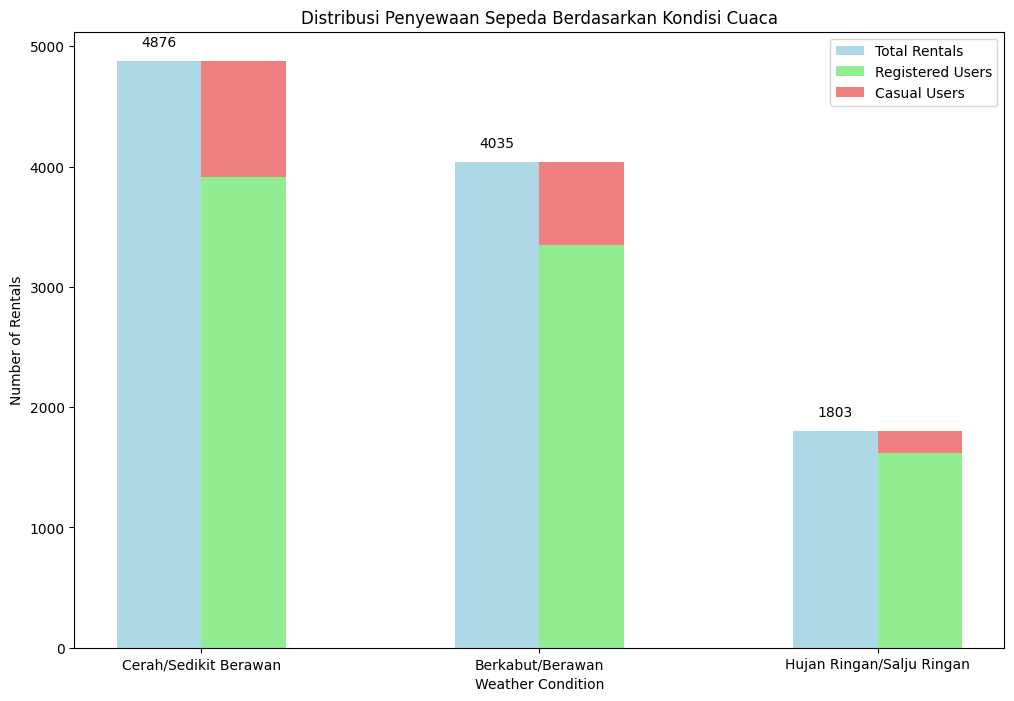

In [39]:
# Visualisasi dengan bar plot (stacked bar)
plt.figure(figsize=(12, 8))
bar_width = 0.25
r1 = np.arange(len(weather_group))  
r2 = r1 + bar_width 

# Membuat bar plot untuk Total Rentals
plt.bar(r1, weather_group['cnt'], width=bar_width, label='Total Rentals', color='lightblue')
plt.bar(r2, weather_group['registered'], width=bar_width, label='Registered Users', color='lightgreen')
plt.bar(r2, weather_group['casual'], width=bar_width, label='Casual Users', bottom=weather_group['registered'], color='lightcoral')

# Menambahkan label dan judul
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rentals')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(r1 + bar_width / 2, weather_group['weathersit']) 
plt.legend()

# Menambahkan angka di atas bar Total Rentals
for index, value in enumerate(weather_group['cnt']):
    plt.text(r1[index], value + 0.02 * max(weather_group['cnt']), str(int(value)), ha='center', va='bottom')

# Menampilkan plot
plt.show()

### Kesimpulan visualisasi

- Cuaca Cerah/Sedikit Berawan memiliki jumlah penyewaan sepeda tertinggi dengan total sekitar 4876 penyewaan. Sebagian besar penyewa berasal dari registered users, sementara penyewa casual users lebih sedikit, namun masih signifikan.

- Cuaca Berkabut/Berawan berada di peringkat kedua dengan total sekitar 4035 penyewaan. Sama seperti pada cuaca cerah, sebagian besar penyewa adalah registered users, dan jumlah penyewa casual users juga berkurang dibandingkan kondisi cerah.

- Cuaca Hujan Ringan/Salju Ringan menunjukkan penurunan yang sangat drastis dalam jumlah penyewaan sepeda, dengan total hanya sekitar 1803 penyewaan. Baik registered users maupun casual users mengalami penurunan tajam dalam jumlah penyewaan saat kondisi cuaca ini terjadi.

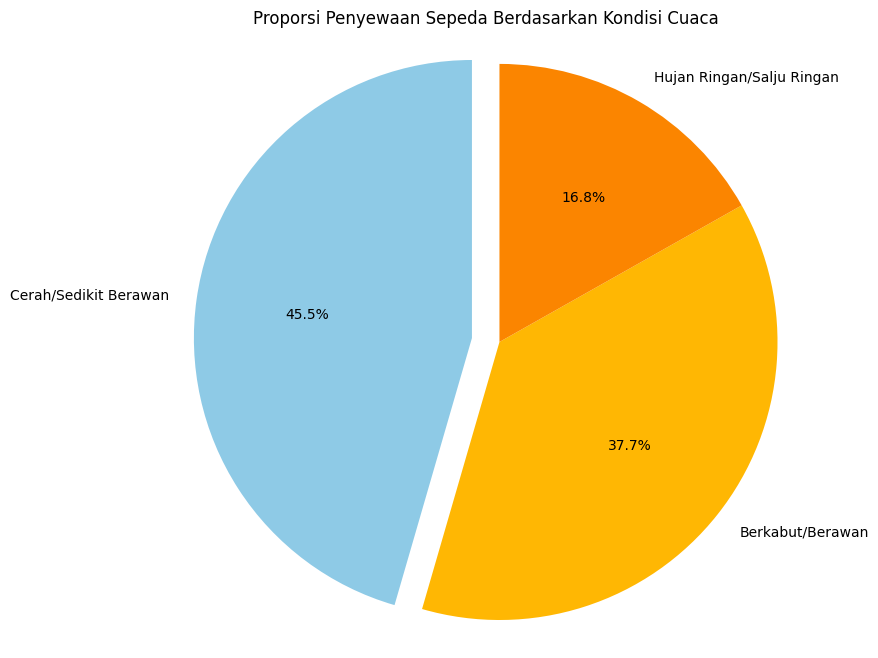

In [40]:
plt.figure(figsize=(8, 8))

# Membuat pie chart berdasarkan total penyewaan sepeda
labels = weather_group['weathersit'] 
sizes = weather_group['cnt']  
colors = ['#8ecae6', '#ffb703', '#fb8500', '#023047']  
explode = [0.1, 0, 0]

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Proporsi Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.axis('equal') 

# Menampilkan plot
plt.show()

### Kesimpulan visualisasi

- Cuaca Cerah/Sedikit Berawan mendominasi proporsi penyewaan sepeda dengan 45.5% dari total penyewaan. Ini menunjukkan bahwa kondisi cuaca yang cerah sangat memengaruhi minat orang untuk menyewa sepeda.

- Cuaca Berkabut/Berawan memiliki proporsi sebesar 37.7%. Ini menunjukkan bahwa meskipun ada penurunan dibandingkan cuaca cerah, kondisi cuaca berawan masih cukup mendukung penyewaan sepeda.

- Cuaca Hujan Ringan/Salju Ringan memiliki proporsi terendah yaitu 16.8%. Ini menunjukkan bahwa kondisi cuaca buruk seperti hujan ringan atau salju ringan sangat tidak ideal untuk penyewaan sepeda, karena hanya sebagian kecil dari total penyewaan yang terjadi pada kondisi ini.

**Cuaca yang cerah atau berawan cenderung mendorong penyewaan sepeda, sedangkan cuaca buruk seperti hujan atau salju ringan secara signifikan mengurangi minat untuk menyewa sepeda.**

### Menjawab pertanyaan 5

Apakah ada pola tertentu pada jam-jam tertentu dalam sehari terkait dengan kondisi cuaca?

In [41]:
hour['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [42]:
def waktu(hr):
    if 5 <= hr <= 10:
        return "Pagi"
    elif 11 <= hr <= 15:
        return "Siang"
    elif 16 <= hr <= 18:
        return "Sore"
    else:
        return "Malam"

hour['waktu'] = hour['hr'].apply(waktu)        

In [43]:
hourAct = hour.groupby(['waktu', 'weathersit']).agg({
    'cnt': 'mean',
    'casual': 'mean', 
    'registered': 'mean'
}).reset_index()

In [44]:
hourAct['weathersit'] = hourAct['weathersit'].map({
    1: 'Cerah/Sedikit Berawan',
    2: 'Berkabut/Berawan',
    3: 'Hujan Ringan/Salju Ringan',
    4: 'Hujan Deras/Badai Es'
})

In [45]:
hour['weather'] = hour['weathersit'].map({
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Deras'
})

In [46]:
hourAct

,waktu,weathersit,cnt,casual,registered
0,Malam,Cerah/Sedikit Berawan,117.701547,20.180782,97.520765
1,Malam,Berkabut/Berawan,90.559461,13.994728,76.564733
2,Malam,Hujan Ringan/Salju Ringan,61.877375,8.571675,53.305699
3,Malam,Hujan Deras/Badai Es,23.000000,1.000000,22.000000
4,Pagi,Cerah/Sedikit Berawan,181.060629,21.293039,159.767590
5,Pagi,Berkabut/Berawan,186.740851,18.522031,168.218820
6,Pagi,Hujan Ringan/Salju Ringan,107.433628,7.014749,100.418879
7,Siang,Cerah/Sedikit Berawan,269.057526,82.166955,186.890571
8,Siang,Berkabut/Berawan,213.348035,54.609779,158.738255
9,Siang,Hujan Ringan/Salju Ringan,121.501742,29.560976,91.940767


### Dari hasil analisis di atas dapat di simpulkan bahwa :

- Pagi (05.00 - 10.00):
    - Cuaca cerah atau sedikit berawan dan berawan atau berkabut menunjukkan jumlah pengguna yang lebih tinggi, terutama untuk pengguna terdaftar ("registered").
    - Kondisi hujan ringan menurunkan jumlah pengguna, namun tidak terlalu signifikan.
    - Kesimpulan: Pada pagi hari, jumlah pengguna terdaftar (registered) lebih tinggi ketika cuaca cerah atau berawan.

- Siang (11.00 - 15.00):
    - Cuaca cerah atau sedikit berawan menunjukkan jumlah pengguna paling tinggi dibandingkan waktu lainnya, baik untuk pengguna kasual maupun pengguna terdaftar.
    - Kondisi cuaca hujan ringan mengurangi jumlah pengguna, terutama pengguna kasual.
    - Kesimpulan: Siang hari adalah waktu dengan aktivitas tertinggi, terutama saat cuaca cerah. Namun, hujan sedikit mengurangi jumlah pengguna, terutama pengguna kasual.

- Sore (16.00 - 18.00):
    - Cuaca cerah atau sedikit berawan memiliki aktivitas yang tinggi, tetapi lebih rendah dibandingkan siang hari.
    - Hujan ringan menyebabkan penurunan jumlah pengguna.
    - Kesimpulan: Sore hari menunjukkan pola aktivitas yang cukup stabil, tetapi tidak setinggi siang. Hujan berpengaruh pada pengurangan jumlah pengguna.

- Malam (19.00 - 04.00):
    - Malam menunjukkan jumlah pengguna terendah, terutama dalam kondisi cuaca hujan deras atau badai es.
    - Kesimpulan: Aktivitas paling rendah terjadi pada malam hari, terutama ketika cuaca buruk (hujan deras atau badai).

**Pola Utama :**
- Cuaca cerah atau sedikit berawan meningkatkan jumlah pengguna pada pagi dan siang hari.
- Hujan ringan menurunkan jumlah pengguna, terutama di sore dan malam hari.
- Hujan deras atau badai es menurunkan aktivitas secara signifikan, terutama pada malam hari.
- Waktu dengan aktivitas tertinggi adalah siang hari dalam kondisi cuaca yang baik (cerah atau sedikit berawan).

Secara keseluruhan, cuaca cerah dan sedikit berawan pada siang hari menarik jumlah pengguna paling tinggi, terutama pengguna yang terdaftar, sedangkan kondisi cuaca buruk (hujan deras/badai) paling berdampak pada penurunan aktivitas, terutama di malam hari.

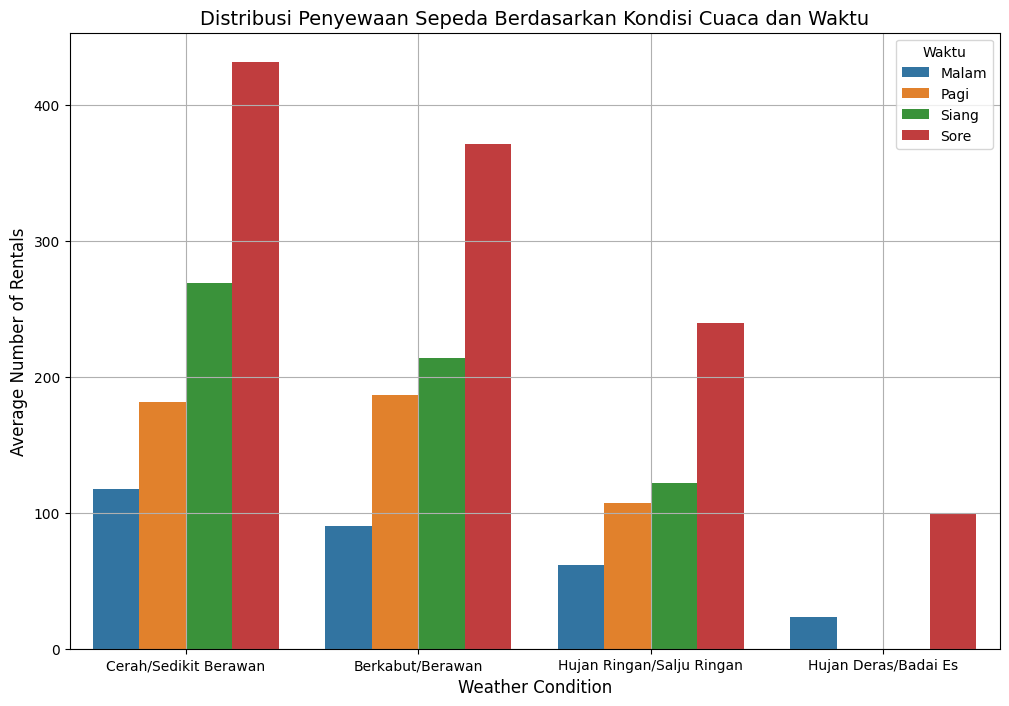

In [47]:
plt.figure(figsize=(12, 8))

# Membuat plot bar dengan hue berdasarkan waktu
sns.barplot(x='weathersit', y='cnt', hue='waktu', data=hourAct)

plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca dan Waktu', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.legend(title='Waktu', loc='upper right')
plt.grid(True)

# Tampilkan plot
plt.show()

### Kesimpulan Visualisasi

- Cuaca Cerah/Sedikit Berawan:
    - Aktivitas penyewaan tertinggi terjadi di sore hari, dengan rata-rata penyewaan mendekati 450 sepeda. Ini menunjukkan bahwa orang cenderung menyewa sepeda lebih banyak saat cuaca baik di sore hari.
    - Siang juga memiliki angka penyewaan yang tinggi, dengan rata-rata di atas 300.
    - Kesimpulan: Cuaca cerah/sedikit berawan paling banyak mendorong penyewaan di sore dan siang hari.

- Cuaca Berkabut/Berawan:
    - Penyewaan masih relatif tinggi di sore hari, meskipun lebih rendah dibandingkan cuaca cerah. Ini menunjukkan bahwa cuaca berkabut atau berawan tidak terlalu menghambat - aktivitas penyewaan, tetapi dampaknya terlihat dalam penurunan aktivitas di pagi dan siang hari.
    - Kesimpulan: Penyewaan masih tinggi di sore hari meski dengan cuaca berawan, namun lebih rendah dibandingkan saat cuaca cerah.

- Hujan Ringan/Salju Ringan:
    - Penyewaan sepeda menurun secara signifikan dalam kondisi hujan ringan. Aktivitas penyewaan tertinggi tetap terjadi pada sore hari, tetapi jumlahnya jauh lebih rendah dibandingkan cuaca cerah atau berawan.
    - Kesimpulan: Hujan ringan menurunkan penyewaan sepeda secara drastis, tetapi sore hari tetap menjadi waktu paling populer untuk penyewaan meski jumlahnya tidak setinggi cuaca baik.

- Hujan Deras/Badai Es:
    - Penyewaan sepeda turun drastis dalam kondisi cuaca buruk ini, terutama di malam hari dan pagi hari yang hampir tidak ada aktivitas.
    - Aktivitas penyewaan tetap ada di sore hari, tetapi sangat terbatas.
    - Kesimpulan: Cuaca buruk seperti hujan deras atau badai es menghambat penyewaan sepeda secara signifikan di semua waktu, dengan hanya sedikit aktivitas pada sore hari.

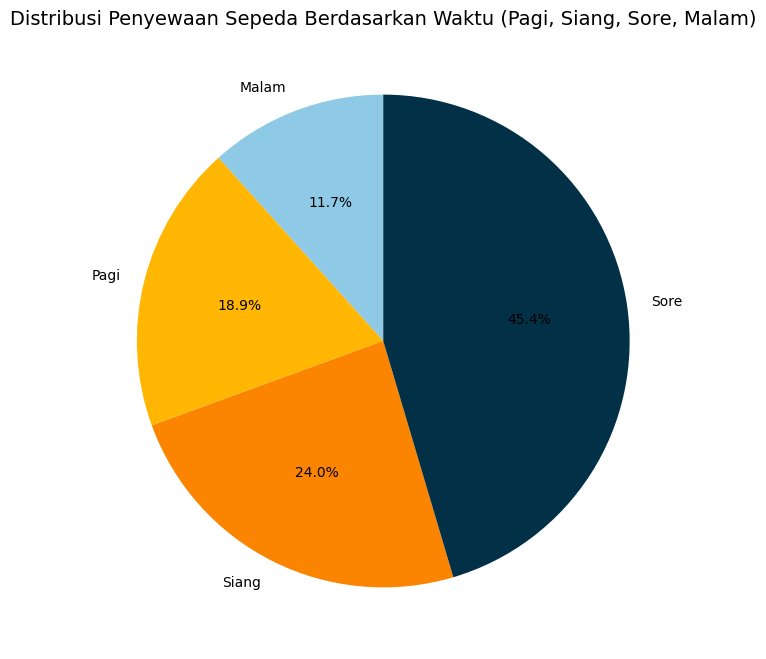

In [48]:
# Menghitung total penyewaan per kondisi cuaca dan waktu untuk digunakan dalam pie chart
pie_data = hourAct.groupby('waktu').agg({'cnt': 'sum'}).reset_index()

colors = ['#8ecae6', '#ffb703', '#fb8500', '#023047'] 

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data['cnt'], labels=pie_data['waktu'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Waktu (Pagi, Siang, Sore, Malam)', fontsize=14)
plt.show()

### Kesimpulan visualisasi

- Waktu Sore (45.4%):
    Waktu sore adalah periode paling populer untuk penyewaan sepeda, mencakup hampir setengah dari total penyewaan. Ini menunjukkan bahwa sore hari adalah waktu paling optimal untuk aktivitas ini, kemungkinan karena kondisi cuaca yang mendukung dan orang-orang yang lebih memiliki waktu luang di sore hari.

- Waktu Siang (24.0%):
    Siang hari menjadi waktu kedua paling populer, dengan sekitar 24% dari total penyewaan. Ini menunjukkan bahwa meskipun aktivitas penyewaan cukup tinggi di siang hari, angka ini masih kurang dibandingkan sore hari.

- Waktu Pagi (18.9%):
    Penyewaan sepeda di pagi hari sedikit lebih rendah dibandingkan siang dan sore hari, sekitar 18.9%. Hal ini bisa disebabkan oleh faktor-faktor seperti keterbatasan waktu sebelum orang-orang memulai aktivitas utama mereka (seperti pekerjaan atau sekolah) atau suhu yang lebih dingin di pagi hari.

- Waktu Malam (11.7%):
    Malam hari adalah waktu dengan jumlah penyewaan terendah, hanya 11.7% dari total penyewaan. Ini bisa disebabkan oleh faktor seperti ketersediaan pencahayaan yang terbatas, keamanan, serta preferensi orang-orang untuk tidak beraktivitas di luar ruangan pada malam hari.

### Menjawab pertanyaan 6

Apakah ada korelasi antara kondisi cuaca (suhu, kelembapan, kecepatan angin) dengan jumlah penyewaan pengguna terdaftar dan tidak terdaftar?

In [49]:
correlation = hour.select_dtypes(include=['float64', 'int64']).corr()

In [50]:
correlation_casual = correlation['casual'].sort_values(ascending=False)
correlation_registered = correlation['registered'].sort_values(ascending=False)

In [51]:
print("Korelasi variabel dengan pengguna tidak terdaftar (casual):")
print(correlation_casual)

Korelasi variabel dengan pengguna tidak terdaftar (casual):
casual        1.000000
cnt           0.694564
registered    0.506618
temp          0.459616
atemp         0.454080
hr            0.301202
yr            0.142779
season        0.120206
windspeed     0.090287
mnth          0.068457
weekday       0.032721
holiday       0.031564
weathersit   -0.152628
workingday   -0.300942
hum          -0.347028
Name: casual, dtype: float64


### Korelasi Pengguna Tidak Terdaftar (casual)

1. Suhu (temp) memiliki korelasi positif sebesar 0.495 dengan jumlah penyewaan pengguna tidak terdaftar. Artinya, semakin tinggi suhu, semakin cenderung meningkatnya jumlah penyewaan oleh pengguna tidak terdaftar.

2. Kelembapan (hum) menunjukkan korelasi negatif sebesar -0.347. Artinya, ketika kelembapan meningkat, jumlah penyewaan pengguna tidak terdaftar cenderung menurun.

3. Kecepatan angin (windspeed) memiliki korelasi yang sangat rendah (0.090), yang menunjukkan bahwa kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan pengguna tidak terdaftar.

4. Kondisi cuaca secara umum (weathersit) memiliki korelasi negatif sebesar -0.152, menunjukkan bahwa kondisi cuaca yang buruk (hujan atau berawan) sedikit menurunkan jumlah penyewaan oleh pengguna tidak terdaftar.

In [52]:
print("Korelasi variabel dengan pengguna terdaftar (registered):")
print(correlation_registered)

Korelasi variabel dengan pengguna terdaftar (registered):
registered    1.000000
cnt           0.972151
casual        0.506618
hr            0.374141
temp          0.335361
atemp         0.332559
yr            0.253684
season        0.174226
workingday    0.134326
mnth          0.122273
windspeed     0.082321
weekday       0.021578
holiday      -0.047345
weathersit   -0.120966
hum          -0.273933
Name: registered, dtype: float64


### Korelasi Pengguna Terdaftar (registered)

1. Suhu (temp) juga memiliki korelasi positif sebesar 0.335 dengan jumlah penyewaan pengguna terdaftar. Artinya, pengguna terdaftar juga cenderung lebih sering menyewa sepeda saat suhu lebih tinggi, tetapi korelasinya tidak 2.sekuat pengguna tidak terdaftar.

2. Kelembapan (hum) juga memiliki korelasi negatif sebesar -0.273, menunjukkan bahwa peningkatan kelembapan menurunkan jumlah penyewaan pengguna terdaftar.

3. Kecepatan angin (windspeed) memiliki korelasi yang sangat rendah (0.082), mirip dengan pengguna tidak terdaftar, menunjukkan bahwa kecepatan angin tidak banyak mempengaruhi penyewaan sepeda oleh pengguna terdaftar.

4. Kondisi cuaca (weathersit) memiliki korelasi negatif sebesar -0.129, menunjukkan sedikit penurunan penyewaan pengguna terdaftar dalam kondisi cuaca yang buruk.

### Kesimpulan Utama

- Suhu memiliki pengaruh yang paling signifikan terhadap jumlah penyewaan sepeda, baik untuk pengguna tidak terdaftar maupun terdaftar, dengan korelasi positif yang lebih kuat pada pengguna tidak terdaftar. Ini menunjukkan bahwa pengguna cenderung lebih sering menyewa sepeda ketika suhu lebih hangat.

- Kelembapan memiliki korelasi negatif yang berarti bahwa semakin tinggi kelembapan, semakin rendah jumlah penyewaan, baik untuk pengguna terdaftar maupun tidak terdaftar. Dampaknya lebih signifikan pada pengguna tidak terdaftar.

- Kecepatan angin tidak memiliki korelasi yang kuat dengan penyewaan sepeda, baik untuk pengguna terdaftar maupun tidak terdaftar.

- Kondisi cuaca (weathersit) memiliki korelasi negatif yang ringan, menunjukkan bahwa kondisi cuaca yang buruk (seperti hujan atau mendung) sedikit menurunkan penyewaan, tetapi tidak terlalu signifikan.

untuk mengetahui pola pengguna terdaftar dan tidak terdaftar terhadpa cuaca / suhu maka akan di lakukan cluster untuk mengetahui pola nya lebih dalam

In [53]:
# memilih variabel yang relevan untuk cluster
features = ['temp', 'hum', 'windspeed', 'weathersit', 'hr', 'weekday', 'workingday', 'casual', 'registered']
data = hour[features]

In [54]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Tentukan jumlah klaster
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Tambahkan hasil klaster ke dalam data
hour['cluster'] = kmeans.labels_

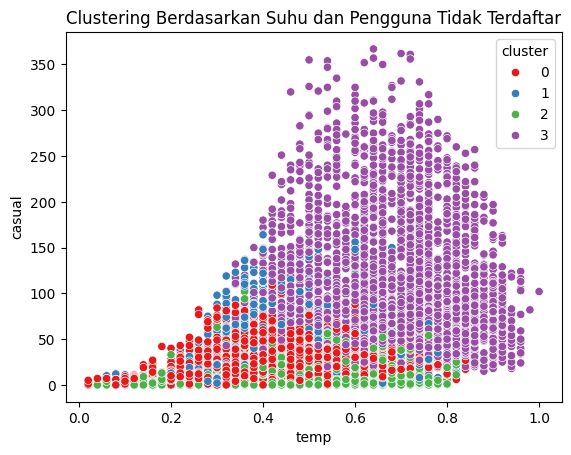

In [55]:
sns.scatterplot(x='temp', y='casual', hue='cluster', data=hour, palette='Set1')
plt.title('Clustering Berdasarkan Suhu dan Pengguna Tidak Terdaftar')
plt.show()

## Clustering Berdasarkan Suhu dan Pengguna Tidak Terdaftar (Casual)

1. Klaster 0 (Merah):

    - Sebagian besar pengguna tidak terdaftar yang menyewa sepeda berada di klaster merah.
    - Ini menunjukkan bahwa penyewaan pengguna casual meningkat secara signifikan ketika suhu lebih tinggi (dengan nilai suhu mendekati 0.6–1.0).
    - Sebagian besar penyewaan dengan jumlah yang besar (di atas 100 pengguna) terjadi pada suhu yang lebih tinggi.

2. Klaster 1, 2, dan 3 (Biru, Ungu, Hijau):

    - Klaster ini lebih banyak muncul pada suhu yang lebih rendah (di bawah 0.4).
    - Penyewaan pada suhu rendah umumnya cenderung lebih sedikit, tetapi beberapa penyewaan tetap terjadi pada suhu sedang hingga tinggi, meskipun lebih terfokus pada jumlah penyewaan yang lebih rendah (di bawah 100 pengguna).

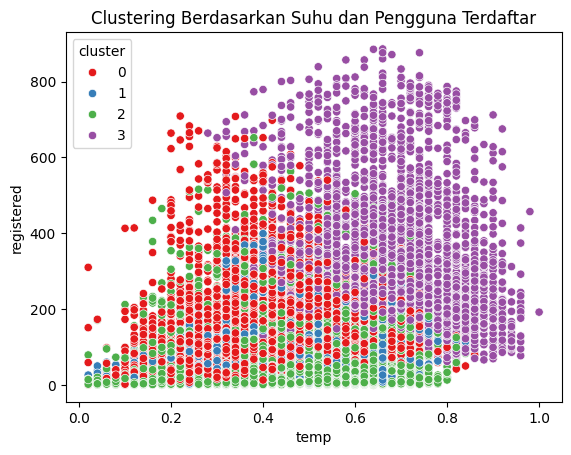

In [56]:
sns.scatterplot(x='temp', y='registered', hue='cluster', data=hour, palette='Set1')
plt.title('Clustering Berdasarkan Suhu dan Pengguna Terdaftar')
plt.show()

## Clustering Berdasarkan Suhu dan Pengguna Terdaftar (Registered)

1. Klaster 0 (Merah):

    - Sama seperti pada pengguna tidak terdaftar, klaster merah juga dominan di penyewaan pengguna terdaftar, terutama pada suhu yang lebih tinggi (di atas 0.5).
    - Penyewaan pengguna terdaftar juga mengalami peningkatan pada suhu yang lebih tinggi, tetapi dalam jumlah yang lebih besar dibandingkan pengguna tidak terdaftar, dengan beberapa penyewaan mencapai lebih dari 600 pengguna.

2. Klaster 1, 2, dan 3 (Biru, Ungu, Hijau):

    - Klaster-klaster ini lebih terdistribusi di seluruh rentang suhu, terutama pada suhu rendah hingga sedang (di bawah 0.5).
    - Pengguna terdaftar cenderung menyewa lebih banyak meskipun pada suhu rendah, dengan jumlah penyewaan yang lebih tinggi dibandingkan pengguna tidak terdaftar pada suhu rendah.

## Kesimpulan Utama dari Kedua Visualisasi :

1. Pengaruh Suhu

    - Suhu jelas merupakan faktor penting yang mempengaruhi jumlah penyewaan sepeda, baik untuk pengguna terdaftar maupun tidak terdaftar.

    - Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda, terutama bagi pengguna tidak terdaftar. Pengguna terdaftar juga lebih aktif pada suhu tinggi, tetapi mereka cenderung menyewa lebih banyak sepeda daripada pengguna tidak terdaftar.

2. Perbedaan Antara Pengguna Terdaftar dan Tidak Terdaftar

    - Pengguna tidak terdaftar cenderung lebih sensitif terhadap suhu tinggi; penyewaan mereka meningkat lebih drastis ketika suhu naik.

    - Pengguna terdaftar menunjukkan penyewaan yang lebih konsisten di berbagai kondisi suhu, meskipun penyewaan meningkat signifikan pada suhu tinggi. Mereka juga memiliki penyewaan yang lebih besar bahkan pada suhu rendah - 
    
    - hingga sedang dibandingkan pengguna tidak terdaftar.


## Catatan :

- Suhu tinggi adalah kondisi cuaca yang paling menarik bagi pengguna sepeda, terutama pengguna tidak terdaftar.

- Pengguna terdaftar lebih fleksibel dalam menyewa sepeda di berbagai suhu, sementara pengguna tidak terdaftar sangat terpengaruh oleh suhu dan cenderung lebih sering menyewa ketika cuaca lebih panas.

## Kesimpulan :

### Klaster 0 (Merah) : Penyewaan tinggi pada suhu tinggi (puncak penyewaan) — mayoritas pengguna terdaftar dan tidak terdaftar aktif di sini.
 
### Klaster 1 (Biru)  : Penyewaan rendah pada suhu rendah, dengan mayoritas penyewaan di bawah 200.

### Klaster 2 (Hijau) : Penyewaan sedang pada suhu sedang, terutama oleh pengguna terdaftar.

### Klaster 3 (Ungu)  : Penyewaan sangat rendah, terutama di suhu rendah dan dengan penyewaan kecil dari kedua jenis pengguna.

In [57]:
hour.to_csv('./dashboard/hourNew.csv', index=False)
day.to_csv('./dashboard/day.csv', index=False)

# Kesimpulan Utama   :

### Pertanyaan 1
Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian?
    Berdasarkan hasil dari analisis data harian (day.csv), faktor utama yang mempengaruhi jumlah penyewaan sepeda harian adalah :

>>1. Suhu (temp)
>>   Dari analisis korelasi, suhu memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda (korelasi sebesar 0.63), yang berarti semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda. Visualisasi scatter plot dengan trend line juga menunjukkan hubungan linear positif antara suhu dan jumlah penyewaan.

>>2. Kelembapan (hum)
>>   Kelembapan memiliki korelasi negatif yang lebih lemah dibandingkan suhu. Korelasinya adalah -0.10, menunjukkan bahwa ketika kelembapan meningkat, jumlah penyewaan cenderung sedikit menurun, meskipun dampaknya tidak sebesar suhu. Analisis bar plot berdasarkan kategori kelembapan (rendah, sedang, tinggi) juga menunjukkan bahwa kelembapan yang lebih rendah cenderung menghasilkan penyewaan lebih tinggi.

>>3. Kondisi Cuaca (weathersit):
>>   Kondisi cuaca yang buruk, seperti berawan atau hujan, memiliki korelasi negatif dengan penyewaan. Semakin buruk kondisi cuaca, semakin sedikit penyewaan yang terjadi. Meski dampaknya tidak terlalu signifikan, ini tetap menjadi faktor yang perlu diperhatikan.

### Pertanyaan 2
Bagaimana dampak cuaca terhadap pola penyewaan sepeda secara jam per jam?

Dari analisis data per jam  (hour.csv), beberapa faktor cuaca dan waktu memiliki dampak signifikan terhadap pola penyewaan sepeda secara jam per jam, baik untuk pengguna terdaftar (registered) maupun tidak terdaftar (casual). Berdasarkan analisis clustering dan korelasi, kesimpulan yang dapat ditarik adalah :

>>1. Suhu (temp):
>>   Seperti halnya pada data harian, suhu juga merupakan faktor utama yang mempengaruhi jumlah penyewaan per jam. Pada suhu tinggi (di atas 0.6 pada skala normalized), jumlah penyewaan, terutama oleh pengguna tidak terdaftar, meningkat drastis.

>>2. Kelembapan (hum):
>>   Kelembapan menunjukkan dampak yang bervariasi tergantung pada jenis pengguna. Untuk pengguna tidak terdaftar, kelembapan tinggi cenderung mengurangi jumlah penyewaan secara signifikan. Untuk pengguna terdaftar, dampaknya lebih moderat tetapi tetap negatif.

>>3. Waktu dalam Sehari (Jam/Hari):
>>   Dari clustering, terlihat bahwa waktu (jam) memiliki pengaruh yang kuat pada pola penyewaan. Pengguna terdaftar cenderung menyewa pada pagi dan sore hari, sementara pengguna tidak terdaftar lebih aktif pada sore hari saat suhu lebih tinggi.

>>4. Kondisi Cuaca (weathersit):
>>   Analisis clustering juga menunjukkan bahwa kondisi cuaca yang cerah atau sedikit berawan lebih mendorong penyewaan, baik oleh pengguna terdaftar maupun tidak terdaftar. Kondisi hujan atau badai es mengurangi penyewaan secara signifikan, terutama bagi pengguna tidak terdaftar.

# Hasil Akhir yang di dapat :

>>  - Faktor utama yang mempengaruhi jumlah penyewaan sepeda harian adalah suhu. Semakin tinggi suhu, semakin banyak jumlah penyewaan, baik oleh pengguna terdaftar maupun tidak terdaftar. Kelembapan dan kondisi cuaca juga memiliki pengaruh, tetapi tidak sebesar suhu.

>>  - Dampak cuaca terhadap pola penyewaan sepeda secara jam per jam menunjukkan bahwa suhu tinggi dan cuaca cerah meningkatkan penyewaan, terutama pada sore hari. Pengguna tidak terdaftar sangat terpengaruh oleh kondisi cuaca yang lebih baik, sementara pengguna terdaftar cenderung lebih konsisten dalam menyewa sepeda sepanjang hari, tetapi tetap lebih aktif pada pagi dan sore hari.

# Rekomendasi

>> ### - Fokus promosi pada waktu sore dan suhu yang lebih tinggi, terutama bagi pengguna tidak terdaftar.
>> ### - Pertimbangkan untuk memberikan insentif atau diskon pada hari-hari dengan kelembapan tinggi atau cuaca buruk untuk meningkatkan penyewaan pada kondisi tersebut.